# SUMMARY

This project gives us an overveiw of our customers, credit card providers, browser and mail platform with the most traffic and strategic time to push a product.

In [1]:
# Importing libraries from python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re




In [2]:
# Reading in the file with the help of pandas library
data = pd.read_csv('Ecomerce-Copy1.csv')

# Data Wrangling

In [3]:
data.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [4]:
data.isnull().sum()

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

In [5]:
data.columns

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')

In [6]:
data.drop(['Lot','CC Exp Date','CC Security Code','IP Address','Credit Card'], axis = 1, inplace= True)

In [34]:
data.head()

,Address,AM or PM,Browser Info,Company,CC Provider,Email,Job,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",Mastercard,anthony41@reed.com,Drilling engineer,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",Discover,brent16@olson-robinson.info,Drilling engineer,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,es,77.82


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Address         10000 non-null  object 
 1   AM or PM        10000 non-null  object 
 2   Browser Info    10000 non-null  object 
 3   Company         10000 non-null  object 
 4   CC Provider     10000 non-null  object 
 5   Email           10000 non-null  object 
 6   Job             10000 non-null  object 
 7   Language        10000 non-null  object 
 8   Purchase Price  10000 non-null  float64
dtypes: float64(1), object(8)
memory usage: 703.2+ KB


In [9]:
data.describe()

,Purchase Price
count,10000.000000
mean,50.347302
std,29.015836
min,0.000000
25%,25.150000
50%,50.505000
75%,75.770000
max,99.990000


In [10]:
data['Purchase Price'].mean()

50.34730200000025

# EDA

## Marketing Analysis

Questions;


- Know your customer(KYC) - Company, Address, Language and Job description can give you an insight
- When is the best time to push a product
- Highest mail platform(Trying to get the platform with the most traffic)
- Highest provider of Credit Card on this platform(We would use the CCprovider's column)
- Browser with the most traffic


## Question 1



### KYC

In [11]:
# Company Distribution


data['Company'].value_counts().head(15)

Brown Ltd         15
Smith Group       15
Smith PLC         13
Smith LLC         13
Williams LLC      12
Smith and Sons    11
Davis and Sons    11
Brown Group       10
Johnson LLC       10
Johnson Ltd       10
Smith Inc         10
Smith Ltd         10
Williams Inc       9
Johnson PLC        9
Jones and Sons     9
Name: Company, dtype: int64

In [12]:
top_5_coy = data['Company'].value_counts().head(5)

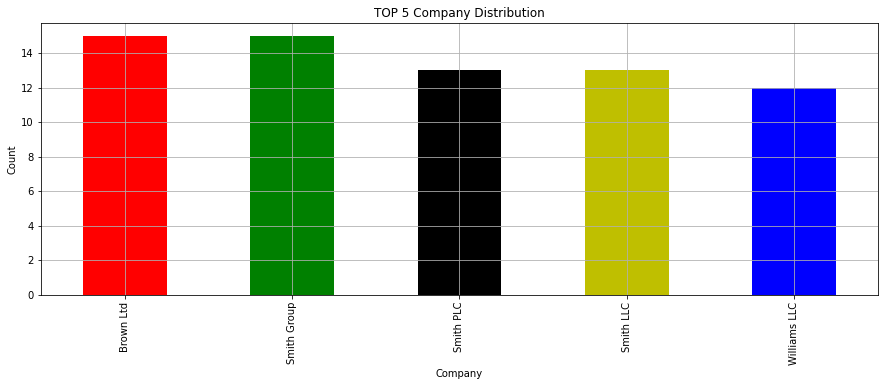

In [13]:
plt.figure(figsize=(15,5))
top_5_coy.plot.bar(color= ['r', 'g', 'k','y', 'b'])
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('TOP 5 Company Distribution')
plt.grid();

In [14]:
# Geoghraphical Distribution


#re.search('(?<=(\n))\d')

#hightlight_regex_matches(pattern, Address)

# addy = data['Address'].apply(lambda x : re.findall('\n[\w\s]*', x))

# addy.replace(('\n', ''), inplace = True)

# addy.value_counts()

In [15]:
#What language do our customers speak?

# Helps us to be more inclusive in services to the most popular language

# Language distribution in %

data['Language'].value_counts(normalize = True) * 100

de    11.55
ru    11.55
el    11.37
pt    11.18
en    10.98
fr    10.97
es    10.95
it    10.86
zh    10.59
Name: Language, dtype: float64

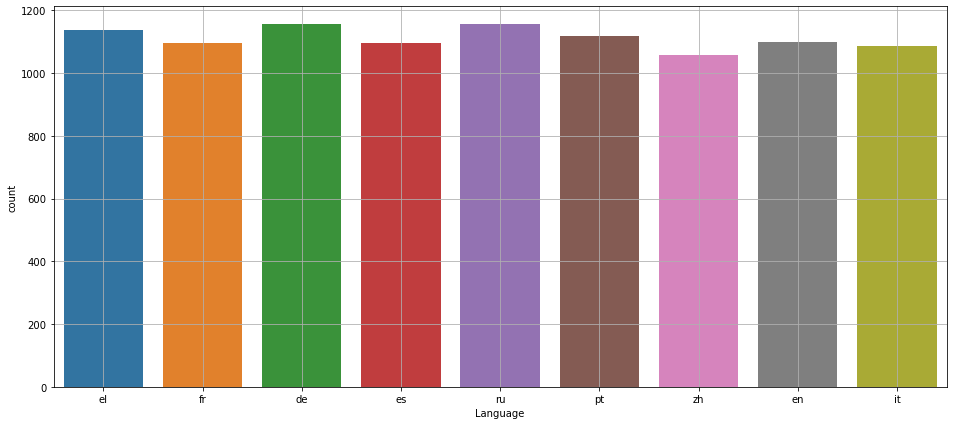

In [16]:
plt.figure(figsize=(16,7))

sns.countplot(x = 'Language', data = data )

plt.grid();


In [17]:
# Job distribution
job_Dist=data['Job'].value_counts().head(6)

job_Dist

Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Purchasing manager                   27
Designer, jewellery                  27
Research officer, political party    27
Name: Job, dtype: int64

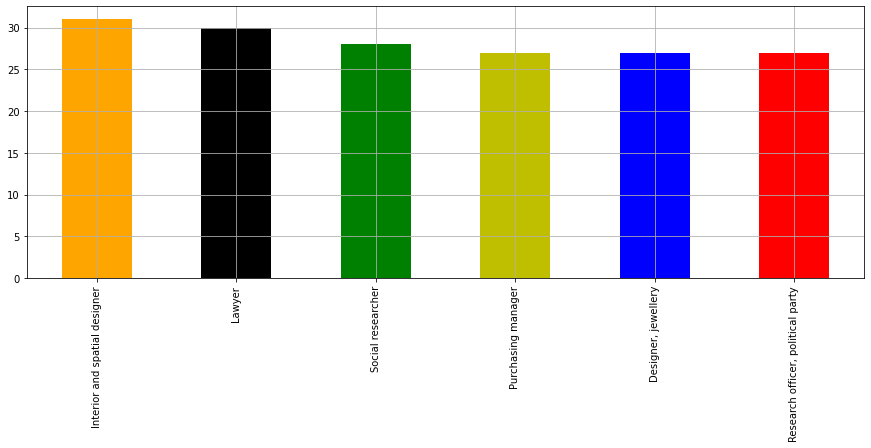

In [18]:
plt.figure(figsize=(15,5))

job_Dist.plot.bar(color = ['orange','k','g','y','b','r'])

plt.grid();

## Question 2

In [19]:
data['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

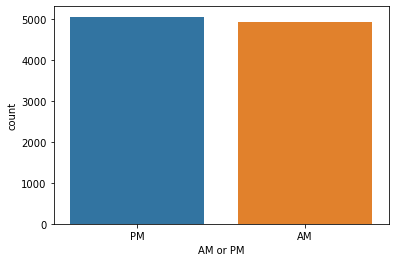

In [20]:
# The difference between the distribution of AM and PM is 136 which may not be material when compared to the cost of
# running campaign by PM.

# Not enough data to draw conclusion

sns.countplot(x= 'AM or PM', data = data);

## Question 3

In [21]:
data['Email'].unique()

array(['pdunlap@yahoo.com', 'anthony41@reed.com',
       'amymiller@morales-harrison.com', ..., 'tyler16@gmail.com',
       'elizabethmoore@reid.net', 'rachelford@vaughn.com'], dtype=object)

In [22]:
data_email = data['Email'].str.split('@', expand = True)

data_email = data_email[1].str.split('.', expand = True)

top_5_email = data_email[0].value_counts().head(5)


top_5_email

hotmail     1638
yahoo       1616
gmail       1605
smith         69
williams      55
Name: 0, dtype: int64

''

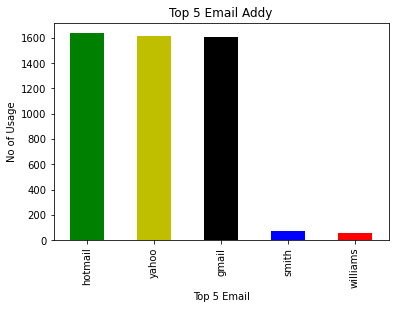

In [23]:
top_5_email.plot.bar(color = ['g','y','k','b','r'])
plt.xlabel('Top 5 Email')
plt.ylabel('No of Usage')
plt.title('Top 5 Email Addy')

;

# With this information, we can answer our question.
#Hotmail is the mail platform with the highest traffic

## Question 3

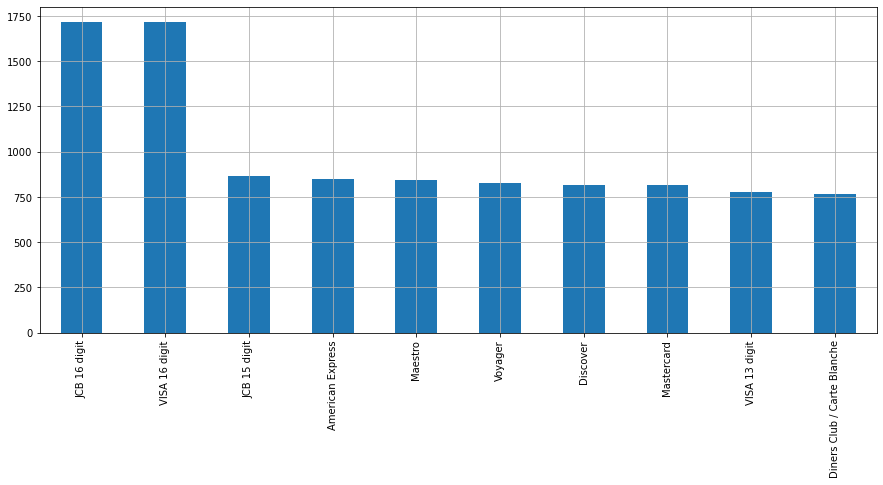

In [24]:
# I would like to see the highest and lowest cc provider. We can decide to offer a discount for the usage of the lowest
# cc provider to encourage prospective user. Likewise offer more points or get an additional item free for usage
# of the highest cc provider

data['CC Provider'].value_counts().plot.bar(figsize =(15,6))
plt.grid();

## Question 4 

<AxesSubplot:>

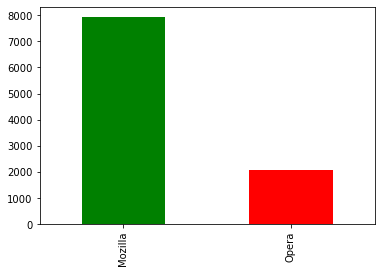

In [25]:
# What browser has the most traffic

data['Browser Info'].str.split("/", expand = True)[0].value_counts().plot.bar(color=['g','r'])

## Financial Analysis

In [26]:
data['Purchase Price'].mean()

50.34730200000025

In [27]:
data['Purchase Price'].std()

29.015836309789048

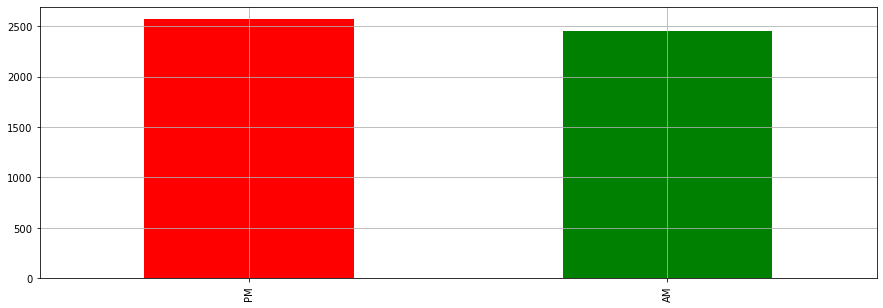

In [28]:
# Here we see customers who spend above the mean purchase price during each period of the day,
# this would be defined as high_pprice

high_pprice = data[data['Purchase Price'] > 50.347]

high_pprice['AM or PM'].value_counts().plot.bar(figsize= (15,5), color=['r','g'])
plt.grid();

In [29]:
# The sample mean of the high_pprice

high_pprice.mean()

C:\Users\OMOLOL~1.OMO\AppData\Local\Temp/ipykernel_10884/3650953183.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  high_pprice.mean()


Purchase Price    75.415709
dtype: float64

In [30]:
high_pprice['Purchase Price'].min()

50.35

In [31]:
high_pprice['Purchase Price'].max()

99.99

In [32]:
# The sample mean of the low_pprice

low_pprice = data[data['Purchase Price'] < 50.347]

low_pprice['AM or PM'].value_counts()

PM    2501
AM    2484
Name: AM or PM, dtype: int64

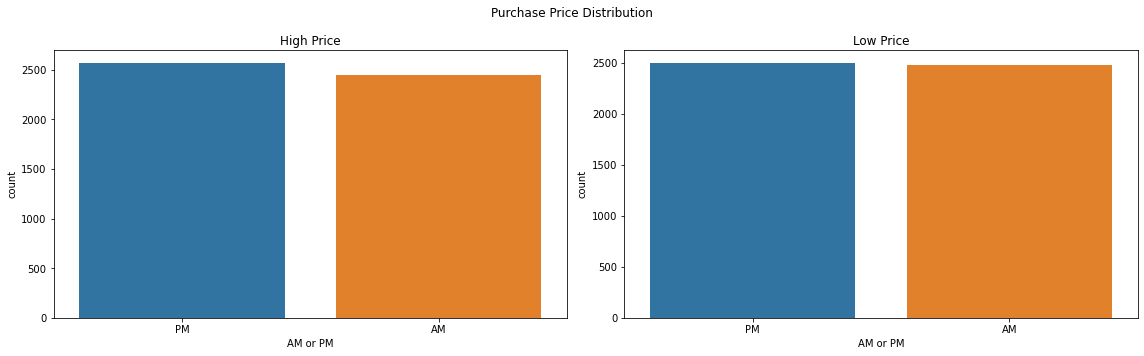

In [33]:
## Comparing both sample data together to draw a conclusion on when it is more profitable to 
#push a new product

plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
sns.countplot(x ='AM or PM', data = high_pprice)
plt.title('High Price')

plt.subplot(1,2,2)
sns.countplot(x='AM or PM', data = low_pprice)
plt.title('Low Price')


plt.suptitle('Purchase Price Distribution')
plt.tight_layout();
